In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("global.csv", encoding='latin1')  # or try encoding='ISO-8859-1'

In [3]:
df.dropna(inplace=True)

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

C:\Users\intel\AppData\Local\Temp\ipykernel_11028\312075123.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\intel\AppData\Local\Temp\ipykernel_11028\312075123.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [5]:
df['Month'] = df['Order Date'].dt.to_period('M')


In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days

In [8]:
df.to_csv('cleaned_superstore.csv', index=False)

In [9]:
sns.set(style="whitegrid")

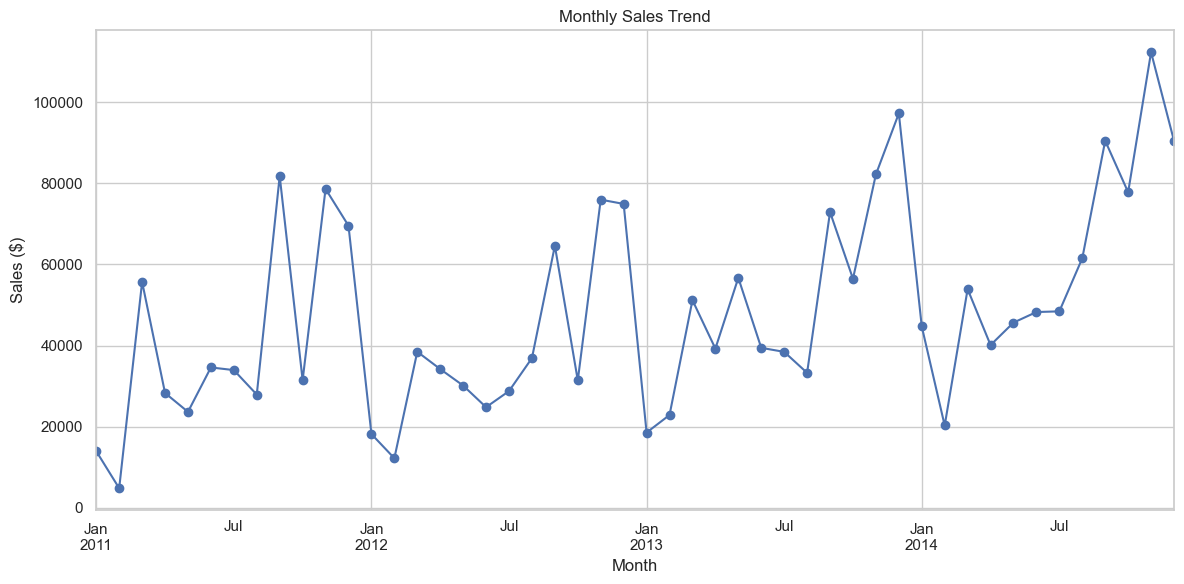

In [ ]:
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()

C:\Users\intel\AppData\Local\Temp\ipykernel_11028\3095023533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette='coolwarm')


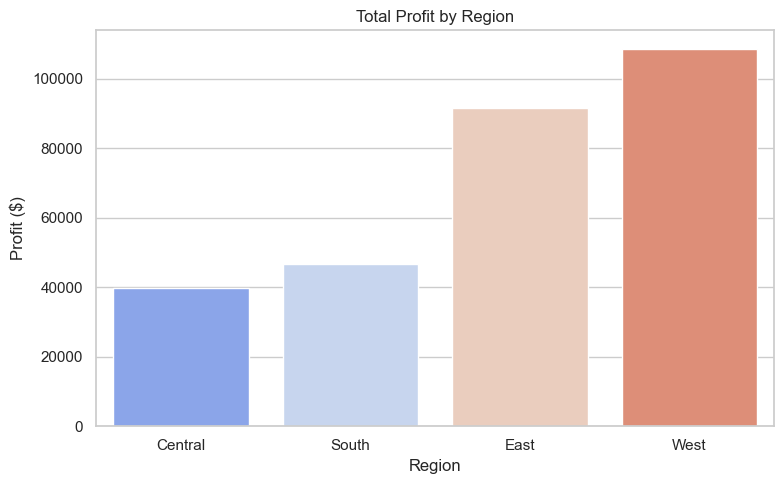

In [11]:
plt.figure(figsize=(8, 5))
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
sns.barplot(x=region_profit.index, y=region_profit.values, palette='coolwarm')
plt.title('Total Profit by Region')
plt.ylabel('Profit ($)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

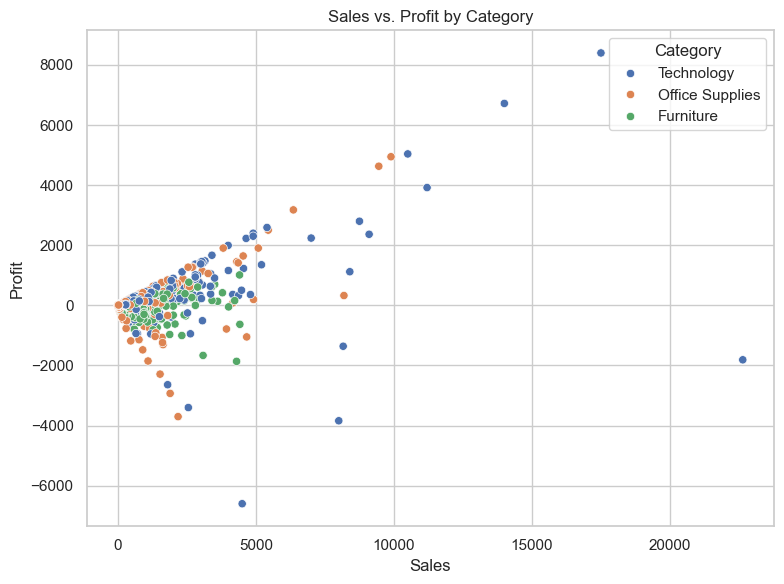

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs. Profit by Category')
plt.tight_layout()
plt.show()